In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def adj_values(vals,q1,q3):
    upper_adj_value = q3 + (q3-q1)*1.5
    upper_adj_value = np.clip(upper_adj_value,q3,vals[-1])

    lower_adj_value = q1 - (q3-q1)*1.5
    lower_adj_value = np.clip(lower_adj_value,vals[0],q1)
    return lower_adj_value, upper_adj_value

In [11]:
def set_axis_style(ax,labels):
    ax.set_xticks(np.arange(1,len(labels)+1),labels=labels)
    ax.set_xlim(0.25,len(labels)+0.75)
    ax.set_xlabel('nazwa próbki')

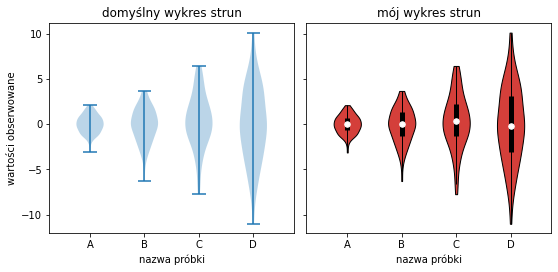

In [12]:
#tworzenie danych testowych
np.random.seed(19680801)
data = [sorted(np.random.normal(0,std,100)) for std in range(1,5)]
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(9,4),sharey=True)

ax1.set_title('domyślny wykres strun')
ax1.set_ylabel('wartości obserwowane')
ax1.violinplot(data)

ax2.set_title('mój wykres strun')
parts = ax2.violinplot(data,
                       showmeans=False, showmedians=False,showextrema=False)
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

quartile1,medians,quartile3 = np.percentile(data,[25,50,75],axis=1)
whiskers = np.array([adj_values(sorted_array,q1,q3)
                    for sorted_array,q1,q3 in zip(data,quartile1,quartile3)])
whiskers_min,whiskers_max = whiskers[:,0], whiskers[:,1]

inds = np.arange(1,len(medians)+1)
ax2.scatter(inds,medians,marker='o',color='white',s=30,zorder=3)
ax2.vlines(inds,quartile1,quartile3,colors='k', linestyle='-',lw=5)
ax2.vlines(inds,whiskers_min,whiskers_max,colors='k',linestyle='-',lw=1)

labels = ['A','B','C','D']
for ax in [ax1,ax2]:
    set_axis_style(ax,labels)

plt.subplots_adjust(bottom=0.15,wspace=0.05)
plt.show()